The representation graph offers a mathematical handle on YAML. These examples should help understanding the richness of such graph when using sequences, maps and nesting.

In [1]:
# !pip install -e ~/xgi["all"]

In [2]:
import networkx as nx
import yaml
import xgi

from src import nx_yaml

def draw(stream):
    G = yaml.compose(stream, Loader=nx_yaml.NxSafeLoader)
    G = G.graph
    H = xgi.from_bipartite_graph(G, create_using=xgi.DiHypergraph)
    xgi.draw_bipartite(H)
    # xgi.draw(H)

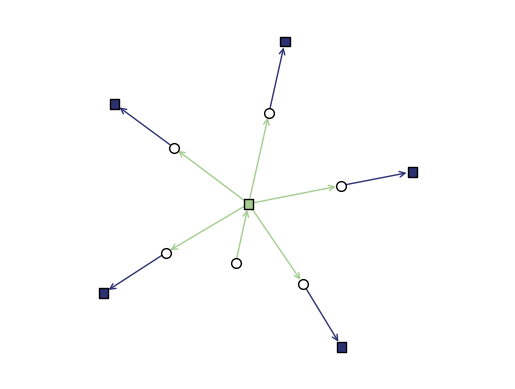

In [59]:
# mappings introduce one hypernode for the keys
# and one per mapping entry
draw("{1, 2, 3, 4, 5}")

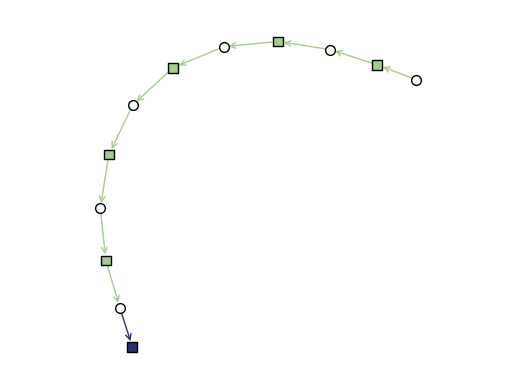

In [4]:
# a list is a path from the root
draw("[1, 2, 3, 4, 5]")

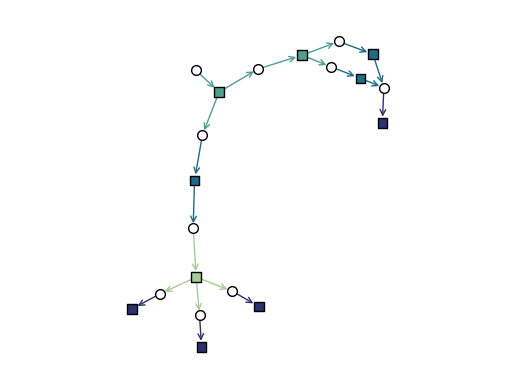

In [57]:
# maps put all keys into one hyperedge
# and one for each key-value pair.
draw("""
a: {8, 9, 2}
{8, 9}: a
""")

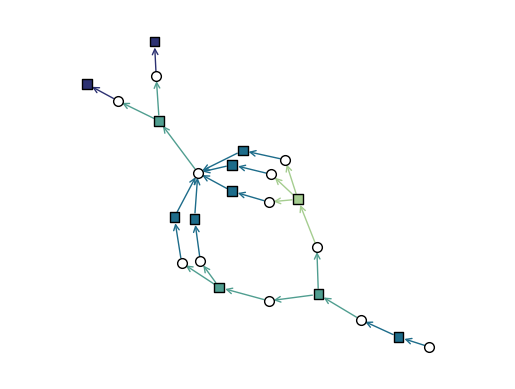

In [83]:
# note that 3 through 7 are open
# and join into {9, a} root
draw("""
- ? {3, 4}
  ? {5, 6, 7}
- {9, a}
""")

So far we have used unique integer indices to avoid confusion. These were irrelevant because the encoding only cares about document structure. It is natural to think about equal scalars as the same nodes but that must be handled separately.